# Without Fragmentation

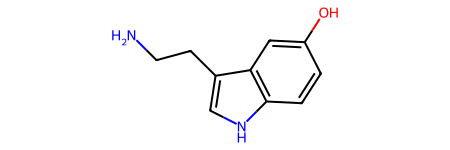

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

SMILES = "C1=CC2=C(C=C1O)C(=CN2)CCN"
mol = Chem.MolFromSmiles(SMILES)
mol

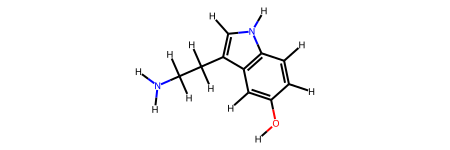

In [2]:
mol = Chem.AddHs(mol)
mol

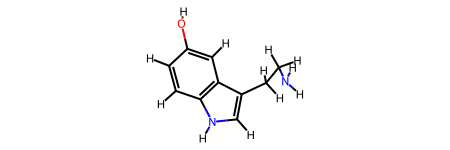

In [3]:
AllChem.EmbedMolecule(mol)
mol

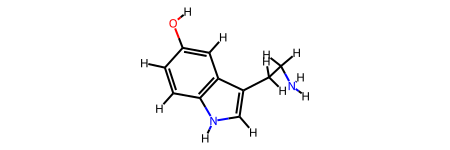

In [4]:
AllChem.MMFFOptimizeMolecule(mol)
mol

In [5]:
print(Chem.MolToMolBlock(mol))


     RDKit          3D

 25 26  0  0  0  0  0  0  0  0999 V2000
   -3.3542    0.5206   -0.3309 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9246   -0.7974   -0.1571 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5477   -1.0444   -0.2261 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6076   -0.0387   -0.4572 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0657    1.2858   -0.6282 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4382    1.5381   -0.5613 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.9288    2.8031   -0.7212 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.6876   -0.6540   -0.4610 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4883   -2.0029   -0.2394 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8533   -2.2235   -0.0916 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.0063    0.0246   -0.6716 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6207    0.5997    0.6134 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.1772   -0.4253    1.4986 N   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4150    0.7525   -0

# On Fragments

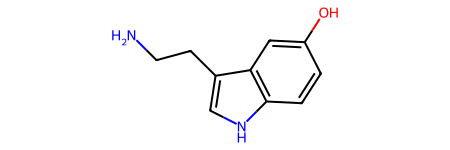

In [6]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

SMILES = "C1=CC2=C(C=C1O)C(=CN2)CCN"
mol = Chem.MolFromSmiles(SMILES)
mol

In [7]:
acyclic_single = [idx for idx, bond in enumerate(mol.GetBonds())
                       if (bond.GetBondType() == Chem.rdchem.BondType.SINGLE) and (bond.IsInRing() == False)]
acyclic_single

[5, 9, 10, 11]

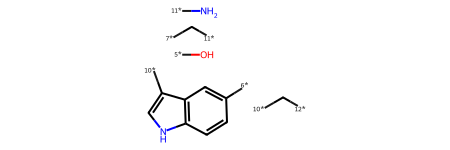

In [8]:
# mol = Chem.FragmentOnBonds(mol, acyclic_single, addDummies = False)
mol = Chem.FragmentOnBonds(mol, acyclic_single, addDummies = True)
mol

In [9]:
for frag in Chem.GetMolFrags(mol, asMols = True):
    frag = Chem.AddHs(frag)
    AllChem.EmbedMolecule(frag)
    AllChem.MMFFOptimizeMolecule(frag)
    
    position = np.array(frag.GetConformer().GetPositions())
    com = position.mean(axis = 0)

    position = position - com

    for idx, atom in enumerate(frag.GetAtoms()):
        print(atom.GetSymbol(), tuple(position[idx]))
    print()

C (-2.031883217401715, 0.8451725560876787, 0.24896383048201706)
C (-0.7592237133535711, 1.3759949339534587, 0.2879288907094649)
C (0.3858822529983569, 0.6285471376000977, 0.09777090882004688)
C (0.2328823668554379, -0.7280530956331951, -0.1445857244714565)
C (-1.037354500410471, -1.2910485278027481, -0.18958203896919243)
C (-2.136291888197055, -0.4976522169815741, 0.006903151813581362)
C (1.5064103898057435, -1.2147186334896836, -0.2927017664980747)
C (2.43159361084144, -0.20591239852745558, -0.14984385785438756)
N (1.7110591403071562, 0.9050033999690213, 0.0875710105885105)
* (-2.984711178876061, -0.8716672741099554, -0.022766132895868842)
* (1.724081671056215, -2.0792533532739066, -0.4616712138040416)
H (-2.9110041101925934, 1.4849176648404685, 0.4070680527221279)
H (-0.6335855226300354, 2.445195740297438, 0.47872930254747376)
H (-1.1458268829817042, -2.3489877559371926, -0.3790910514382279)
H (3.511858345207031, -0.2916042172318814, -0.21534149801914138)
H (2.136113236971825, 1.8440

[10:51:27] UFFTYPER: Unrecognized atom type: *_ (9)
[10:51:27] UFFTYPER: Unrecognized atom type: *_ (10)
[10:51:27] UFFTYPER: Unrecognized atom type: *_ (1)
[10:51:27] UFFTYPER: Unrecognized atom type: *_ (1)
[10:51:27] UFFTYPER: Unrecognized atom type: *_ (2)
[10:51:27] UFFTYPER: Unrecognized atom type: *_ (1)
[10:51:27] UFFTYPER: Unrecognized atom type: *_ (2)
[10:51:27] UFFTYPER: Unrecognized atom type: *_ (1)


# Dataset Distribution

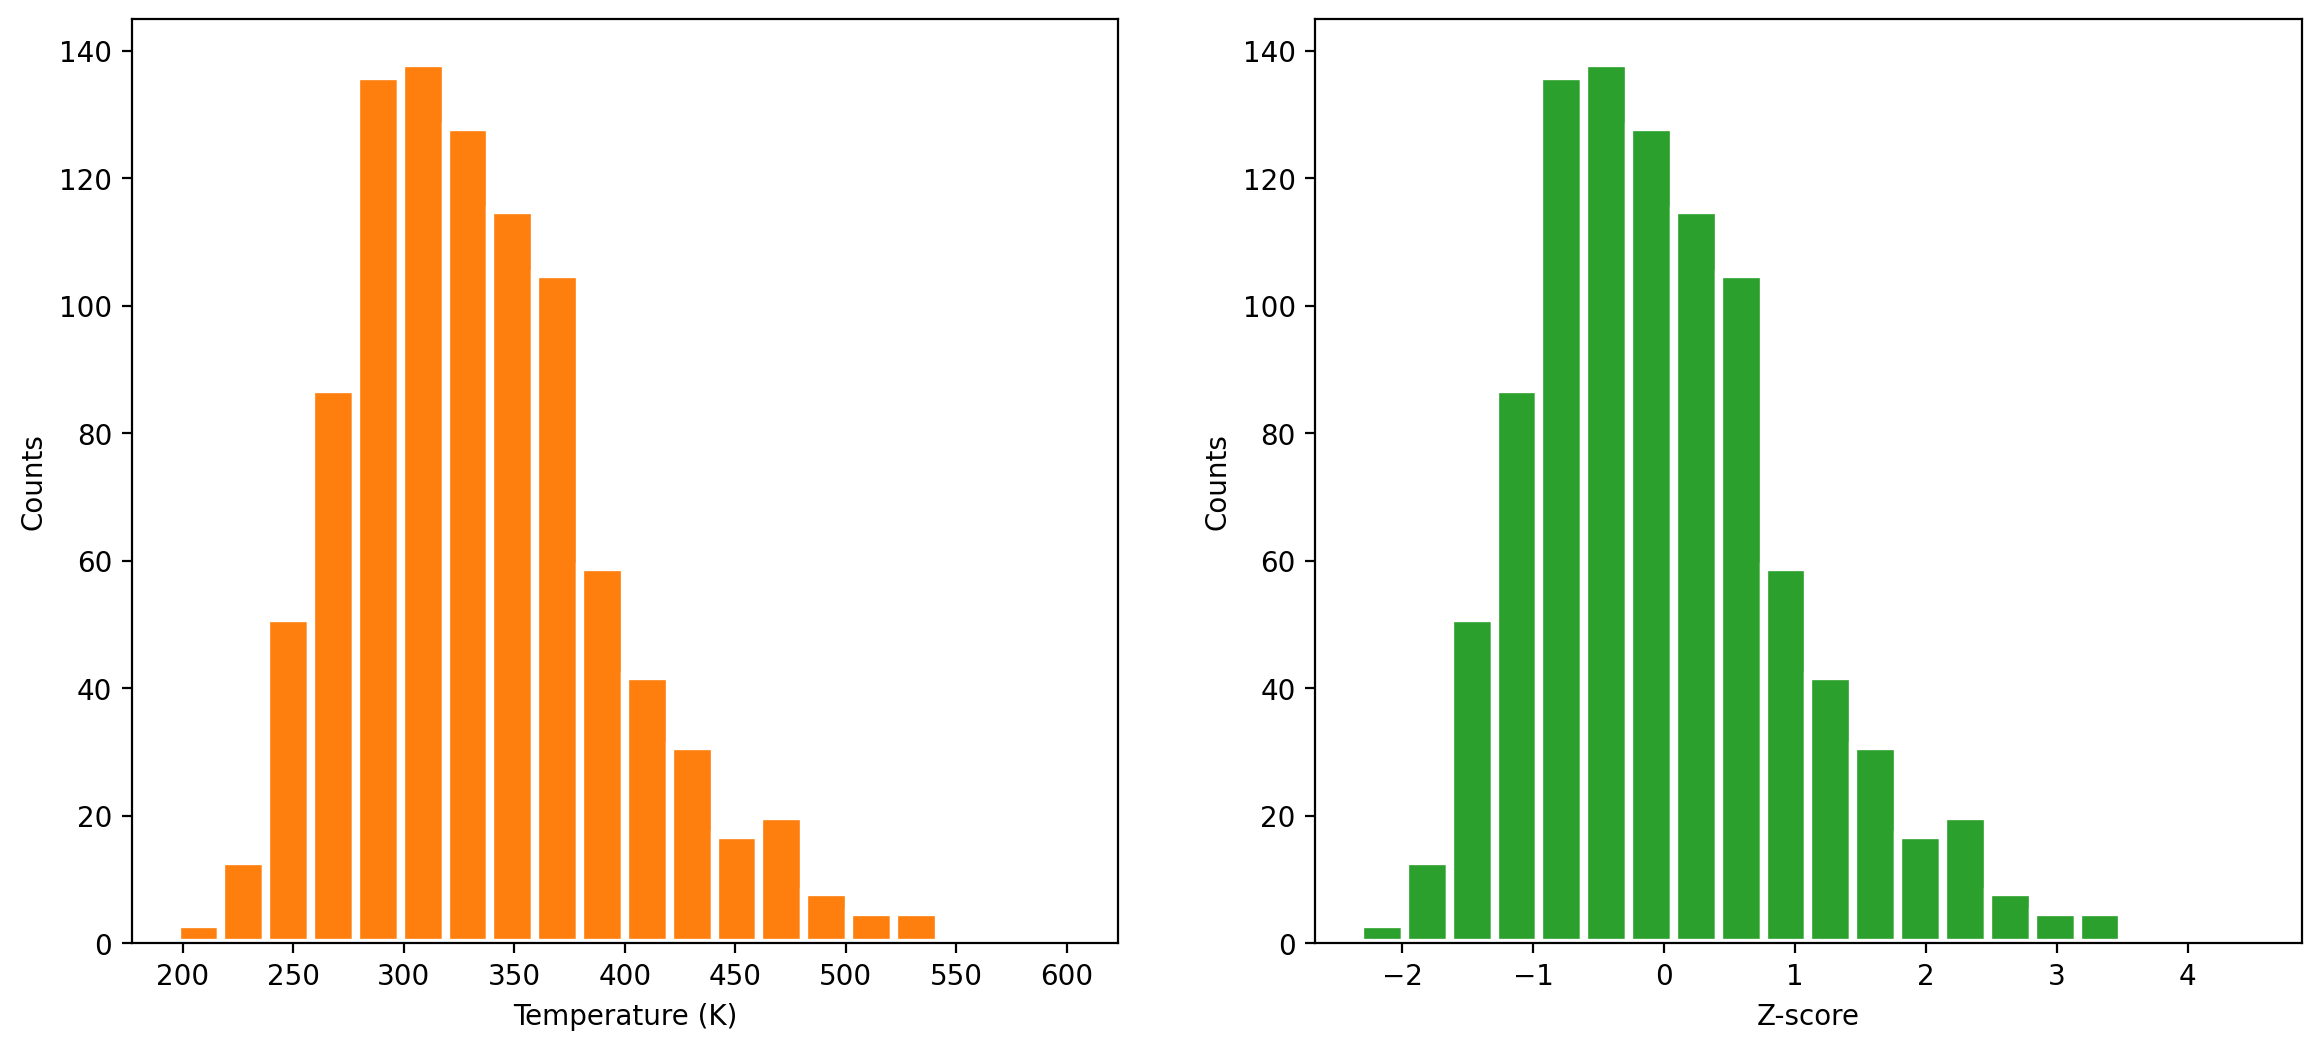

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/DIPPR/FP.csv', index_col = 0)

figure, ax = plt.subplots(1, 2, figsize = (14, 6), dpi = 200)

ax[0].hist(df['Value'], bins = 20, color = 'C1', edgecolor = '#FFFFFF', linewidth = 3)
ax[0].set_xlabel("Temperature (K)")
ax[0].set_ylabel("Counts")

z_score = (df.Value - df.Value.mean()) / df.Value.std()

ax[1].hist(z_score, bins = 20, color = 'C2', edgecolor = '#FFFFFF', linewidth = 3)
ax[1].set_xlabel("Z-score")
ax[1].set_ylabel("Counts")

plt.show()